### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 4.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('dengue')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,15.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,13.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,13.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,13.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,11.0,False,CHEMBL613728,[],ORGANISM,11070
5,"[{'xref_id': 'P29990', 'xref_name': None, 'xre...",Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,9.0,False,CHEMBL5980,"[{'accession': 'P29990', 'component_descriptio...",SINGLE PROTEIN,31634


In [5]:
selected_target1 = target_result.target_chembl_id[5]
selected_target1

'CHEMBL5980'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

1230

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles       0
molecule_chembl_id     0
standard_value        45
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0    100000.0
1     12310.0
2    100000.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
len(df1_selected)

1230

In [19]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [20]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [21]:
df1_selected.describe()

,standard_value
count,1230.000000
mean,47424.321519
std,33161.085107
min,6.000000
25%,22302.500000
50%,42535.000000
75%,67952.500000
max,432000.000000


In [22]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-22-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [23]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-20-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
<ipython-input-23-dc51576c3f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = convert_log(df1_selected)


In [24]:
df1_selected['standard_value'].head()

0    8.091947
1    4.909742
2    8.091947
3    4.292685
4    8.091947
Name: standard_value, dtype: float64

In [25]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [26]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Creating labels and features

In [27]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [28]:
len(df1_x),len(df1_y)

(1230, 1230)

In [29]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('dengue_labels.csv',index=False)

### A quick look at files

In [30]:
! ls

dengue_labels.csv  molecule.smi  sample_data


In [31]:
! cat molecule.smi | head -5

COc1ccc2nc3cccc(OC)c3nc2c1	CHEMBL1401841
O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O	CHEMBL1608853
O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CCOCC1	CHEMBL1429799
O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1	CHEMBL246446
CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(Cl)c1=O	CHEMBL1383455


### Using padel Descriptor to break it into dataset form

In [32]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-09 15:56:41--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-09 15:56:42--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   153MB/s    in 0.2s    

2023-03-09 15:56:42 (153 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-09 15:56:42--  https://github

In [33]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [34]:
! bash padel.sh

Processing CHEMBL1608853 in molecule.smi (2/1230). 
Processing CHEMBL1401841 in molecule.smi (1/1230). 
Processing CHEMBL246446 in molecule.smi (4/1230). Average speed: 2.22 s/mol.
Processing CHEMBL1429799 in molecule.smi (3/1230). Average speed: 3.94 s/mol.
Processing CHEMBL1485159 in molecule.smi (6/1230). Average speed: 1.77 s/mol.
Processing CHEMBL1383455 in molecule.smi (5/1230). Average speed: 2.29 s/mol.
Processing CHEMBL1730401 in molecule.smi (8/1230). Average speed: 1.37 s/mol.
Processing CHEMBL1383611 in molecule.smi (7/1230). Average speed: 1.54 s/mol.
Processing CHEMBL1440986 in molecule.smi (9/1230). Average speed: 1.22 s/mol.
Processing CHEMBL3194058 in molecule.smi (10/1230). Average speed: 1.13 s/mol.
Processing CHEMBL66953 in molecule.smi (11/1230). Average speed: 1.10 s/mol.
Processing CHEMBL3194143 in molecule.smi (13/1230). Average speed: 0.94 s/mol.
Processing CHEMBL1586109 in molecule.smi (12/1230). Average speed: 0.99 s/mol.
Processing CHEMBL1318358 in molecule.

### Model selection and usage

### Importing Modules

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [36]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('dengue_labels.csv')

In [37]:
Y['standard_value'].isnull().sum()

0

In [38]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [39]:
Y.standard_value.unique()

array([8.09, 4.91, 4.29, 4.73, 4.37, 4.26, 4.32, 4.33, 4.45, 4.15, 4.47,
       4.2 , 4.  , 8.37, 4.58, 4.02, 4.31, 8.36, 4.34, 5.02, 4.57, 5.03,
       5.07, 5.13, 4.19, 4.17, 4.4 , 4.23, 8.34, 4.63, 4.27, 4.25, 4.04,
       4.36, 4.07, 8.35, 4.24, 4.22, 5.14, 4.13, 4.46, 8.08, 4.48, 5.2 ,
       4.7 , 4.76, 4.42, 4.66, 4.53, 4.52, 4.79, 4.14, 4.43, 4.71, 4.06,
       4.5 , 4.03, 4.38, 4.64, 4.39, 4.62, 4.51, 4.69, 4.11, 5.08, 8.28,
       4.41, 4.77, 4.35, 4.83, 4.92, 4.3 , 4.54, 4.49, 4.44, 4.1 , 4.78,
       4.08, 8.39, 4.55, 4.72, 4.59, 8.38, 4.09, 5.47, 5.1 , 4.05, 4.67,
       4.28, 4.84, 4.89, 4.18, 5.28, 4.74, 4.56, 5.79, 4.97, 4.8 , 4.86,
       4.99, 5.45, 4.12, 5.34, 8.32, 4.9 , 4.68, 5.01, 4.21, 4.61, 4.81,
       5.15, 8.3 , 5.33, 4.93, 4.94, 4.6 , 4.01, 5.29, 5.25, 5.22, 5.23,
       5.3 , 4.95, 5.16, 4.16, 5.12, 4.82, 5.26, 5.04, 4.85, 4.98, 4.65,
       4.87, 8.31, 4.96, 5.11, 5.42, 4.75, 5.39, 5.27, 8.24, 8.27, 8.25,
       5.57, 5.55, 5.72, 5.48, 8.23, 6.22, 5.52, 5.

In [40]:
Y.describe()

,standard_value
count,1230.000000
mean,5.559691
std,1.679136
min,3.360000
25%,4.320000
50%,4.600000
75%,8.090000
max,8.390000


In [41]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [42]:
X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Y[:5]

array([8.09, 4.91, 8.09, 4.29, 8.09])

In [44]:
X.shape

(1230, 881)

### Defining all the Regressors

In [45]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [46]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [47]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.07340076156351771

Mean Sqaured Error : 2.988736319790372

Mean Absolute Error : 1.397525447491758

Root Mean Squared : 1.7287962053956423


### Decision Tree Regressor

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.8720037230492292

Mean Sqaured Error : 5.212336080058717

Mean Absolute Error : 1.5611144986449863

Root Mean Squared : 2.2830541123807637


### Support Vector Regressor

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.05102085013131963

Mean Sqaured Error : 2.9264225442405265

Mean Absolute Error : 1.1371118514200422

Root Mean Squared : 1.7106789717070021


### Extra Tree Regression

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.7308859959496026

Mean Sqaured Error : 4.819413239446439

Mean Absolute Error : 1.5215731436314373

Root Mean Squared : 2.1953162048885893


### Lasso Regression

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.0016413023150116945

Mean Sqaured Error : 2.7889320064115273

Mean Absolute Error : 1.5011137550399893

Root Mean Squared : 1.6700095827304486


### Ridge Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.4435964117954796

Mean Sqaured Error : 4.019495030698185

Mean Absolute Error : 1.5925826041209878

Root Mean Squared : 2.004867833723257


### Orthogonal Matching Pursuit Regressor

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.23160602309284228

Mean Sqaured Error : 3.4292370423964336

Mean Absolute Error : 1.5191639921594071

Root Mean Squared : 1.8518199270977818


### Linear Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -2.43483279234005e+21

Mean Sqaured Error : 6.779455968042649e+21

Mean Absolute Error : 12872163234.847523

Root Mean Squared : 82337451794.68848


### Model Performance

In [56]:
import seaborn as sns

In [57]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [58]:
model_performance = pd.DataFrame.from_dict(di)

In [59]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,1.728796e+00,-7.340076e-02
1,Decision Tree,2.283054e+00,-8.720037e-01
2,Support Vector,1.710679e+00,-5.102085e-02
3,Extra Tree,2.195316e+00,-7.308860e-01
4,Lasso,1.670010e+00,-1.641302e-03
5,Ridge,2.004868e+00,-4.435964e-01
6,Orthogonal,1.851820e+00,-2.316060e-01
7,Linear,8.233745e+10,-2.434833e+21


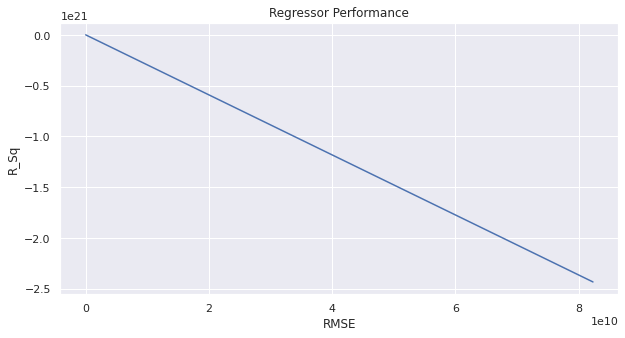

In [60]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [62]:
rmse

1.6700095827304486

### Saving model state for later use

In [63]:
import pickle

pickle.dump(svr,open("dengue_model.pkl","wb"))